In [1]:
import pickle
import pandas as pd
print 'pandas version :',pd.__version__
import numpy as np
import time
from time import time
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')

# import machine learning modules
import sklearn
print 'sklearn version :', sklearn.__version__
from sklearn.externals import joblib
from sklearn.metrics import brier_score_loss, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

% matplotlib inline
% pylab inline

pandas version : 0.22.0
sklearn version : 0.19.1
Populating the interactive namespace from numpy and matplotlib


In [2]:
# clf = joblib.load("../data/RandomForest_Alexa40K_Golden17K_Combined_all_labels_new_bkp.pkl")
# joblib.dump(clf,"../data/RandomForest_Alexa40K_Golden17K_Combined_all_labels_new.pkl",compress=9)

In [3]:
# # Read Alexa Data

train_alexa = pd.read_csv("../data/alexa_with_concepts_train.csv").drop('link',axis=1)
test_alexa = pd.read_csv("../data/alexa_with_concepts_test.csv").drop(['link','predLabel'],axis=1)
print train_alexa.shape,test_alexa.shape

train_gold = pd.read_csv("../data/gold17k_with_concepts_train.csv")
test_gold = pd.read_csv("../data/gold_17k_with_concepts_test.csv")
print train_gold.shape, test_gold.shape

(19706, 3) (4927, 3)
(13516, 3) (3380, 3)


In [4]:
# alexa_batch2 = pd.read_csv("../data/alexa_batch2_with_concepts_content.csv")
# alexa_batch2 = alexa_batch2[['document','final_concept','label']]
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(alexa_batch2[['document','final_concept']], alexa_batch2['label'],
#                                                     stratify=alexa_batch2['label'],test_size=0.20)
# train_alexa_batch2 = pd.concat([X_train,y_train],axis=1).reset_index(drop=True)
# test_alexa_batch2 = pd.concat([X_test,y_test],axis=1).reset_index(drop=True)
# print train_alexa_batch2.shape, test_alexa_batch2.shape
# train_alexa_batch2.to_csv("../data/alexa_batch2_with_concepts_train.csv",index=False)
# test_alexa_batch2.to_csv("../data/alexa_batch2_with_concepts_test.csv",index=False)

train_alexa_batch2 = pd.read_csv("../data/alexa_batch2_with_concepts_train.csv")
test_alexa_batch2 = pd.read_csv("../data/alexa_batch2_with_concepts_test.csv")

# alexa_karun = pd.read_csv("../data/alexa_karun_with_concepts_content.csv")
# alexa_karun = alexa_karun[['document','final_concept','label_IB']].rename(columns={'label_IB':'label'})
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(alexa_karun[['document','final_concept']], alexa_karun['label'],
#                                                     stratify=alexa_karun['label'],test_size=0.20)
# train_alexa_karun = pd.concat([X_train,y_train],axis=1).reset_index(drop=True)
# test_alexa_karun = pd.concat([X_test,y_test],axis=1).reset_index(drop=True)
# print train_alexa_karun.shape,test_alexa_karun.shape
# train_alexa_karun.to_csv("../data/alexa_karun_with_concepts_train.csv",index=False)
# test_alexa_karun.to_csv("../data/alexa_karun_with_concepts_test.csv",index=False)

train_alexa_karun = pd.read_csv("../data/alexa_karun_with_concepts_train.csv")
test_alexa_karun = pd.read_csv("../data/alexa_karun_with_concepts_test.csv")

In [5]:
# Combine all datasets to form final training and test data
train = pd.concat([train_alexa,train_gold,train_alexa_batch2,train_alexa_karun],ignore_index=True)
train = train.dropna().reset_index(drop=True)
train.shape

test = pd.concat([test_alexa,test_gold,test_alexa_batch2,test_alexa_karun],ignore_index=True)
test = test.dropna().reset_index(drop = True)

print train.shape, test.shape

(72856, 3) (18212, 3)


In [81]:
test = pd.read_csv("../data/sahil/cf_bell.csv")
test = test.dropna().reset_index(drop = True)
test=test[['document','final_concept','label']]
print test.head()

                   document  \
0                  Time.com   
1                Vic.gov.au   
2             applyfirst.ca   
3  Worldbaseballclassic.com   
4                   bbb.org   

                                       final_concept            label  
0  newsletters, homepage, u.s, politics, ideas, t...  Careers_College  
1  vic.gov.au, size, vic.gov.au, text size, keywo...  Careers_College  
2  applyfirst.ca, employers, jobs post, post job,...  Careers_College  
3  scoreboard, usa, wins, duty, usa, pr, title, w...  Careers_College  
4  bbb, trust, states, trust states, states canad...  Careers_College  


In [76]:
test_df.head()
test_new=test_df[['document','final_concept','label']]
test_new.to_csv("../data/sahil/cf_bell.csv",encoding='utf-8')

In [6]:
del train_alexa,train_gold,train_alexa_batch2,
del train_alexa_karun,test_alexa,test_gold,test_alexa_batch2,test_alexa_karun

In [114]:
train.head()



document                                      final_concept  \
0           Wayrift.com  toggle,navigation,wiki,archives,wayrift,book,c...   
1              Giml.org  giml,giml,giml giml,giml,officers,president,fa...   
2  Vaughncochranart.com  skip,vaughn,cochran,menu,originals,prints,arch...   
3      Phantasytour.com  toggle,navigation,log,toggle navigation,naviga...   
4      Williamkdaby.com  boat,photo,photo,photojournalist,photo,landsca...   

                                          label  
0  Hobbies and Interests_Video & Computer Games  
1                  Arts and Entertainment_Music  
2                              Shopping_Engines  
3                  Arts and Entertainment_Music  
4                                  News_UNKNOWN

In [67]:
test.head()

document  \
0            Areksmurrayclock.com   
1                      Bonika.com   
2  Westsussexfootballleague.co.uk   
3                  Twidiumapp.com   
4            Poshtotsonline.co.uk   

                                       final_concept  \
0  clock,kits,clock,clock,plans,clock kits,kits c...   
1  loading,status,account order,order status,acco...   
2  littlehampton,athletic,watersfield,reserves,de...   
3  twidium,knowledge,base,affiliate,program,banne...   
4  network,version,uk,delivery,orders,worldwide,c...   

                       label         predLabel  
0           Shopping_Engines  Shopping_Engines  
1           Shopping_Engines  Shopping_Engines  
2            Sports_Football   Sports_Football  
3  Society_Social Networking            Others  
4           Shopping_Engines  Shopping_Engines

In [9]:
# karun = pd.read_csv("../data/alexa_karun_with_concepts_content.csv")
# del karun

In [10]:
# # Earlier labels
# labels_to_retain = ['Shopping_Engines','Arts and Entertainment_Music','News_UNKNOWN','Adult Content_UNKNOWN',
#                     'Hobbies and Interests_Video & Computer Games','Sports_Football','Careers_Job Search',
#                     'Society_Dating','Technology and Computing_Web Search','Society_Social Networking',
#                     'Hobbies and Interests_Freelance Writing']
# train = train[train['label'].isin(labels_to_retain)]
# test['label'][~test['label'].isin(labels_to_retain)] = 'Others'
# uncat['label'][~uncat['label'].isin(labels_to_retain)] = 'Others'

### Tf-Idf Vectors

In [ ]:
def mytoken(s):
    return [i.strip() for i in s.split(",")]

vectorizer = TfidfVectorizer(tokenizer = mytoken)

### Compute tf-idf features from final_concept and train classifier on them

from time import time
t0 = time()
train_feat = vectorizer.fit_transform(train['final_concept'].tolist())
test_feat = vectorizer.transform(test['final_concept'].tolist())
print 'Time taken : %f s'% (time()-t0)

In [ ]:
def mytoken(s):
    return [i.strip() for i in s.split(",")]

vectorizer = TfidfVectorizer(tokenizer = mytoken)

### Compute tf-idf features from final_concept and train classifier on them

from time import time
t0 = time()
train_feat = vectorizer.fit_transform(train['final_concept'].tolist())
test_feat = vectorizer.transform(test['final_concept'].tolist())
print 'Time taken : %f s'% (time()-t0)

In [9]:
train_feat

<72856x9681400 sparse matrix of type '<type 'numpy.float64'>'
	with 31013470 stored elements in Compressed Sparse Row format>

In [103]:
train_feat

<72856x9681400 sparse matrix of type '<type 'numpy.float64'>'
	with 31013470 stored elements in Compressed Sparse Row format>

In [10]:
# joblib.dump(test_feat,"../data/RandomForest_AlexaAll_Golden17K_Combined_all_labels_new_test_feat.pkl")
svd = joblib.load("../data/RandomForestReduced_AlexaAll_Golden17K_Combined_svd_modelSahil.pkl")

In [14]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=500)
# train_feat_transformed = svd.fit_transform(train_feat)
# test_feat_transformed = svd.transform(test_feat)

In [11]:
train_feat_transformed = svd.transform(train_feat)
test_feat_transformed = svd.transform(test_feat)

In [85]:
test_feat_transformed = svd.transform(test_feat)

In [104]:
svd

TruncatedSVD(algorithm='randomized', n_components=500, n_iter=5,
       random_state=None, tol=0.0)

In [33]:
joblib.dump(svd,"../data/RandomForestReduced_AlexaAll_Golden17K_Combined_svd_modelSahil.pkl")

['../data/RandomForestReduced_AlexaAll_Golden17K_Combined_svd_modelSahil.pkl']

### Model Fitting / Prediction

In [13]:
#### Fit model on train data

# clf = MultinomialNB()
# clf = GaussianNB()

from time import time
t0 = time()

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
clf.fit(train_feat_transformed,train['label'])
print 'Time taken : %f s'% (time()-t0)

Time taken : 317.832834 s


In [28]:
#### Fit model on train data

# clf = MultinomialNB()
# clf = GaussianNB()

from time import time
t0 = time()

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
clf.fit(train_feat_transformed,train['label'])
print 'Time taken : %f s'% (time()-t0)


Time taken : 311.740266 s


In [115]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
joblib.dump(clf,"../data/RandomForestReduced_AlexaAll_Golden17K_Combined_Sahil.pkl",compress=6)

['../data/RandomForestReduced_AlexaAll_Golden17K_Combined_Sahil.pkl']

In [64]:
d=pd.read_parquet("../data/sahil/cf_bell")

In [66]:
print d.shape

(6351, 9)


In [86]:
#### Make predictions on test dataset
t0 = time()
pred = clf.predict(test_feat_transformed)
pred_prob = clf.predict_proba(test_feat_transformed)
# pickle.dump(clf,open('randomforest_clf_train_validate.sav','wb'))
# clf = pickle.load(open('randomforest_clf_train_validate.sav','rb'))
print 'Time taken : %f s'% (time()-t0)

Time taken : 25.430300 s


In [21]:
#### Make predictions on test dataset
t0 = time()
pred = clf.predict(test_feat_transformed)
pred_prob = clf.predict_proba(test_feat_transformed)
# pickle.dump(clf,open('randomforest_clf_train_validate.sav','wb'))
# clf = pickle.load(open('randomforest_clf_train_validate.sav','rb'))
print 'Time taken : %f s'% (time()-t0)

Time taken : 69.133124 s


In [50]:
thrshold_mapping=pd.read_csv("../data/label_threshold_mapping.csv",sep="\t")
thrs_df= thrshold_mapping[['label_cat','threshold']]
threshold_dic={}
for index,row in thrs_df.iterrows():
    threshold_dic[row['label_cat']]=row['threshold']

In [87]:
labels=clf.classes_
prediction=[]
for i in range(0,(len(pred_prob))):    
    for j in range(0,(len(pred_prob[i]))):
        if pred_prob[i][j]==max(pred_prob[i]):
            if threshold_dic.has_key(labels[j]) and pred_prob[i][j] >= threshold_dic[labels[j]] :
                prediction.append(labels[j])
                break
            else:
                prediction.append("Others")
                break

In [102]:
print pred_df.shape
print pred_df.head()

(0, 2)
Empty DataFrame
Columns: [label, pred_pro]
Index: []


In [88]:
print len(pred)
print len(pred_prob)
print len(prediction)

6351
6351
6351


In [111]:
fil11=open("../data/sahil/bell_top20cat.p","r")
object_file = pickle.load(fil11)

In [112]:
object_file[["document",""]].to_csv("../data/sahil/mudit_bell_res.txt",sep="\t")

document                                            concept  \
0     clearit.ca  [clearit.ca, pars, tracker, payment, signup, p...   
1      lotum.com  [de, apps, instagram, podcast, impact, lotum, ...   
2  tupperware.ca  [javascript, disabled, browser, disabled brows...   
3     armytek.ca  [promotions, certificates, gift certificates, ...   
4      uniun.com  [uniun.com, fridays, saturdays, guestlist, bot...   

             predicted_category                                given_category  
0              Shopping_Engines                            Business_Marketing  
1              Shopping_Engines  Hobbies and Interests_Video & Computer Games  
2              Shopping_Engines                              Shopping_Engines  
3              Shopping_Engines                              Shopping_Engines  
4  Arts and Entertainment_Music                  Arts and Entertainment_Music

In [89]:
#### Accuracy

test['predLabel'] = pred

print 'Correct : ',test[test['label']==test['predLabel']].shape[0]
print 'Total : ',test.shape[0]
print 'Accuracy : %f percent' %(100.0*test[test['label']==test['predLabel']].shape[0]/test.shape[0])

Correct :  71
Total :  6351
Accuracy : 1.117934 percent


In [100]:
tri=pd.read_csv("../data/sahil/comcast.csv")
tri[['link']].drop_duplicates().to_csv("../data/sahil/links_all_14nov.txt")

In [98]:
tri[['link']].drop_duplicates().shape

(31286, 1)

In [116]:
test.head()
test.to_csv("../data/sahil/prediction_results_bell.txt",sep="\t")
test.head()

document  \
0                  Time.com   
1                Vic.gov.au   
2             applyfirst.ca   
3  Worldbaseballclassic.com   
4                   bbb.org   

                                       final_concept            label  \
0  newsletters, homepage, u.s, politics, ideas, t...  Careers_College   
1  vic.gov.au, size, vic.gov.au, text size, keywo...  Careers_College   
2  applyfirst.ca, employers, jobs post, post job,...  Careers_College   
3  scoreboard, usa, wins, duty, usa, pr, title, w...  Careers_College   
4  bbb, trust, states, trust states, states canad...  Careers_College   

            predLabel  
0        News_UNKNOWN  
1        News_UNKNOWN  
2  Careers_Job Search  
3    Shopping_Engines  
4    Shopping_Engines

# Accuracy

test['predLabel'] = prediction

print 'Correct : ',test[test['label']==test['predLabel']].shape[0]
print 'Total : ',test.shape[0]
print 'Accuracy : %f percent' %(100.0*test[test['label']==test['predLabel']].shape[0]/test.shape[0])

In [57]:
# Save pred_prob
# Save clf.classes_
# Save test['label'], but test is already saved

### Results

   index              label_cat      prec     recal  threshold  f1_score
0     87  Adult Content_UNKNOWN  0.922018  0.782863      0.239  0.846761
   index                                  label_cat      prec     recal  \
0    761  Arts and Entertainment_Books & Literature  0.808383  0.496324   

   threshold  f1_score  
0       0.18  0.615034  
   index                                    label_cat  prec     recal  \
0    929  Arts and Entertainment_Celebrity Fan/Gossip  0.75  0.352941   

   threshold  f1_score  
0      0.161      0.48  
   index                        label_cat      prec  recal  threshold  \
0    944  Arts and Entertainment_Fine Art  0.000659    1.0        0.0   

   f1_score  
0  0.001317  
   index                     label_cat  prec     recal  threshold  f1_score
0    949  Arts and Entertainment_Humor   1.0  0.038462      0.264  0.074074
   index                      label_cat      prec    recal  threshold  \
0    955  Arts and Entertainment_Movies  0.811321  0.682

   index               label_cat     prec  recal  threshold  f1_score
0   4569  Education_College Life  0.00011    1.0        0.0   0.00022
   index                    label_cat      prec  recal  threshold  f1_score
0   4571  Education_Distance Learning  0.000165    1.0        0.0  0.000329
   index            label_cat      prec  recal  threshold  f1_score
0   4573  Education_Education  0.000055    1.0        0.0   0.00011
   index                            label_cat      prec  recal  threshold  \
0   4575  Education_English as a 2nd Language  0.000165    1.0        0.0   

   f1_score  
0  0.000329  
   index                  label_cat      prec  recal  threshold  f1_score
0   4578  Education_Graduate School  0.000329    1.0        0.0  0.000659
   index                     label_cat  prec  recal  threshold  f1_score
0   4584  Education_Homework/StudyTips   0.5    0.2      0.493  0.285714
   index                label_cat      prec  recal  threshold  f1_score
0   4587  Education_K-6

   index                                 label_cat      prec     recal  \
0   5398  Health and Fitness_Psychology/Psychiatry  0.861111  0.601942   

   threshold  f1_score  
0      0.096  0.708571  
   index                         label_cat      prec  recal  threshold  \
0   5469  Health and Fitness_Senior Health  0.000055    1.0        0.0   

   f1_score  
0   0.00011  
   index                         label_cat      prec  recal  threshold  \
0   5471  Health and Fitness_Senior Living  0.000055    1.0        0.0   

   f1_score  
0   0.00011  
   index                     label_cat      prec  recal  threshold  f1_score
0   5473  Health and Fitness_Sexuality  0.000055    1.0        0.0   0.00011
   index                           label_cat      prec  recal  threshold  \
0   5475  Health and Fitness_Sleep Disorders  0.000439    1.0        0.0   

   f1_score  
0  0.000878  
   index                             label_cat  prec  recal  threshold  \
0   5478  Health and Fitness_Smoking C

   index                   label_cat      prec  recal  threshold  f1_score
0   7354  Personal Finance_Investing  0.000165    1.0        0.0  0.000329
   index                      label_cat  prec  recal  threshold  f1_score
0   7357  Personal Finance_Mutual Funds   1.0    0.0        1.0       0.0
   index                             label_cat  prec  recal  threshold  \
0   7359  Personal Finance_Retirement Planning   1.0    0.0        1.0   

   f1_score  
0       0.0  
   index                label_cat      prec  recal  threshold  f1_score
0   7360  Personal Finance_Stocks  0.000165    1.0        0.0  0.000329
   index                      label_cat      prec  recal  threshold  f1_score
0   7362  Personal Finance_Tax Planning  0.000055    1.0        0.0   0.00011
   index                 label_cat     prec  recal  threshold  f1_score
0   7364  Personal Finance_UNKNOWN  0.00011    1.0        0.0   0.00022
   index       label_cat      prec  recal  threshold  f1_score
0   7366  Pets_Aqu

   index     label_cat  prec     recal  threshold  f1_score
0  13760  Sports_Rodeo   1.0  0.666667      0.223       0.8
   index     label_cat      prec  recal  threshold  f1_score
0  13773  Sports_Rugby  0.000055    1.0        0.0   0.00011
   index               label_cat      prec     recal  threshold  f1_score
0  13776  Sports_Running/Jogging  0.918033  0.756757      0.153   0.82963
   index                 label_cat      prec  recal  threshold  f1_score
0  13836  Sports_Saltwater Fishing  0.000055    1.0        0.0   0.00011
   index      label_cat      prec     recal  threshold  f1_score
0  13840  Sports_Skiing  0.890244  0.935897      0.131    0.9125
   index            label_cat      prec  recal  threshold  f1_score
0  13921  Sports_Snowboarding  0.000384    1.0        0.0  0.000768
   index      label_cat      prec  recal  threshold  f1_score
0  13923  Sports_Sports  0.000055    1.0        0.0   0.00011
   index                    label_cat  prec  recal  threshold  f1_score
0 

   index       label_cat      prec  recal  threshold  f1_score
0  14243  Travel_Cruises  0.000055    1.0        0.0   0.00011
   index      label_cat      prec     recal  threshold  f1_score
0  14246  Travel_Hotels  0.833333  0.384615      0.132  0.526316
   index           label_cat  prec  recal  threshold  f1_score
0  14254  Travel_Theme Parks   1.0    0.0        1.0       0.0
   index       label_cat  prec     recal  threshold  f1_score
0  14256  Travel_UNKNOWN   0.5  0.090909       0.34  0.153846


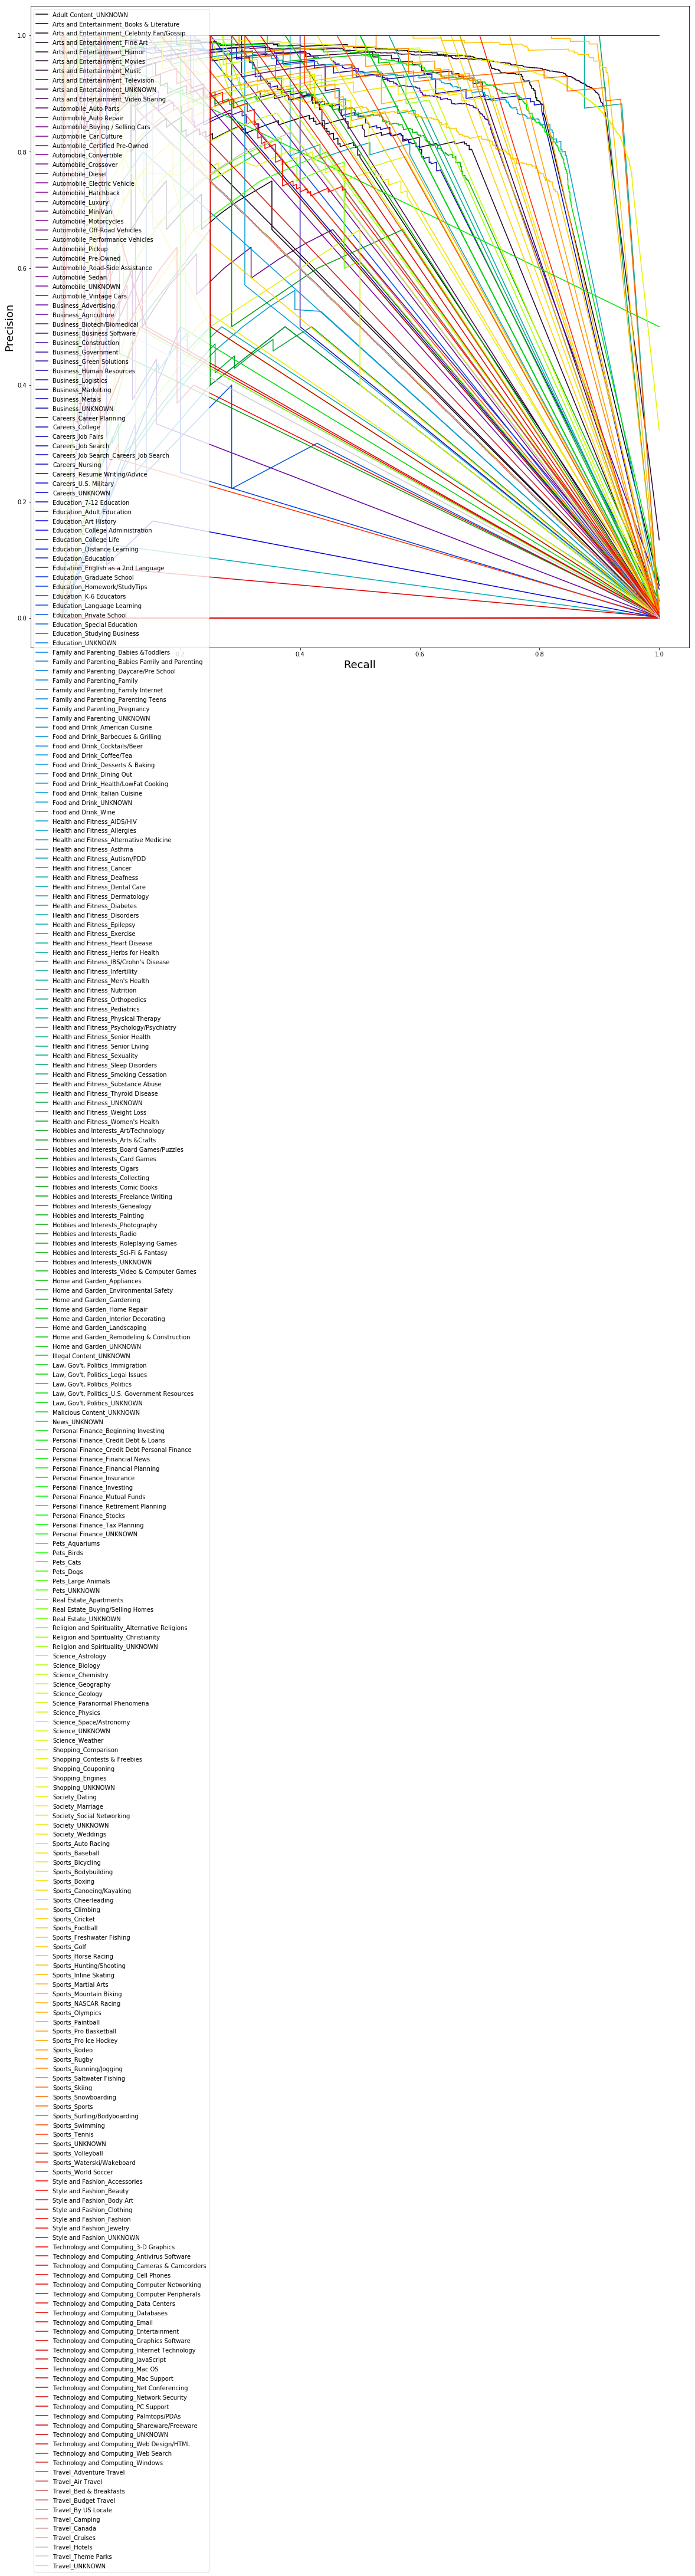

In [38]:
# Plot Precision - Recall Curves

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

keep_maxval = (pred_prob == pred_prob.max(axis=1, keepdims=True)).astype(int)
pred_prob_new = pred_prob*keep_maxval
# clf.classes_
labels = clf.classes_
precision = {}
recall = {}
threshold = {}
threshold_new = pd.DataFrame(columns = ["label_cat", "prec", "recal","threshold","f1_score"])
c=0
out_file=open("../data/label_threshold_mapping.csv",'w')
for i in range(len(labels)):
    threshold_pr = pd.DataFrame(columns = ["label_cat", "prec", "recal","threshold","f1_score"])
    
    temp = test.copy()
    temp['y_true'] = 0
    temp['y_true'][temp['label']==labels[i]] = 1
    precision[i], recall[i], threshold[i] = precision_recall_curve(np.array(temp['y_true']),pred_prob_new[:,i])
    #print labels[i]
    #print len(precision[i])
    #print len(threshold[i])
    threshold[i]=numpy.append(threshold[i], 1.0)
    #print len(threshold[i])
    for new_c in range(len(precision[i])):
        pr=precision[i][new_c]
        rc=recall[i][new_c]
        f1_score=(2*pr*rc)/(pr+rc)
        
        threshold_pr.loc[c]=numpy.array([labels[i], precision[i][new_c], recall[i][new_c],threshold[i][new_c],f1_score], dtype=object)
        
        c+=1
    threshold_new=threshold_pr[threshold_pr['f1_score']==threshold_pr['f1_score'].max()].reset_index()
    
    threshold_new.to_csv(out_file,sep="\t",header=False) 
    print threshold_new

out_file.close()    
f,ax = plt.subplots(figsize=(20,20))
# f.figure()
number_of_plots = len(labels)
colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
ax.set_color_cycle([colormap(i) for i in np.linspace(0, 1,number_of_plots)])
for i in range(len(labels)):
   
    plt.plot(recall[i],precision[i])
# plt.plot(precision[1],recall[1])
plt.xlabel('Recall',fontsize=18)
plt.ylabel('Precision',fontsize=18)
plt.legend(labels,loc=0)
plt.show()

In [60]:
print len(prediction)
print test.head()
test.to_csv("../data/prediction_results.txt",sep="\t")

18212
                         document  \
0            Areksmurrayclock.com   
1                      Bonika.com   
2  Westsussexfootballleague.co.uk   
3                  Twidiumapp.com   
4            Poshtotsonline.co.uk   

                                       final_concept  \
0  clock,kits,clock,clock,plans,clock kits,kits c...   
1  loading,status,account order,order status,acco...   
2  littlehampton,athletic,watersfield,reserves,de...   
3  twidium,knowledge,base,affiliate,program,banne...   
4  network,version,uk,delivery,orders,worldwide,c...   

                       label         predLabel  
0           Shopping_Engines  Shopping_Engines  
1           Shopping_Engines  Shopping_Engines  
2            Sports_Football   Sports_Football  
3  Society_Social Networking            Others  
4           Shopping_Engines  Shopping_Engines  


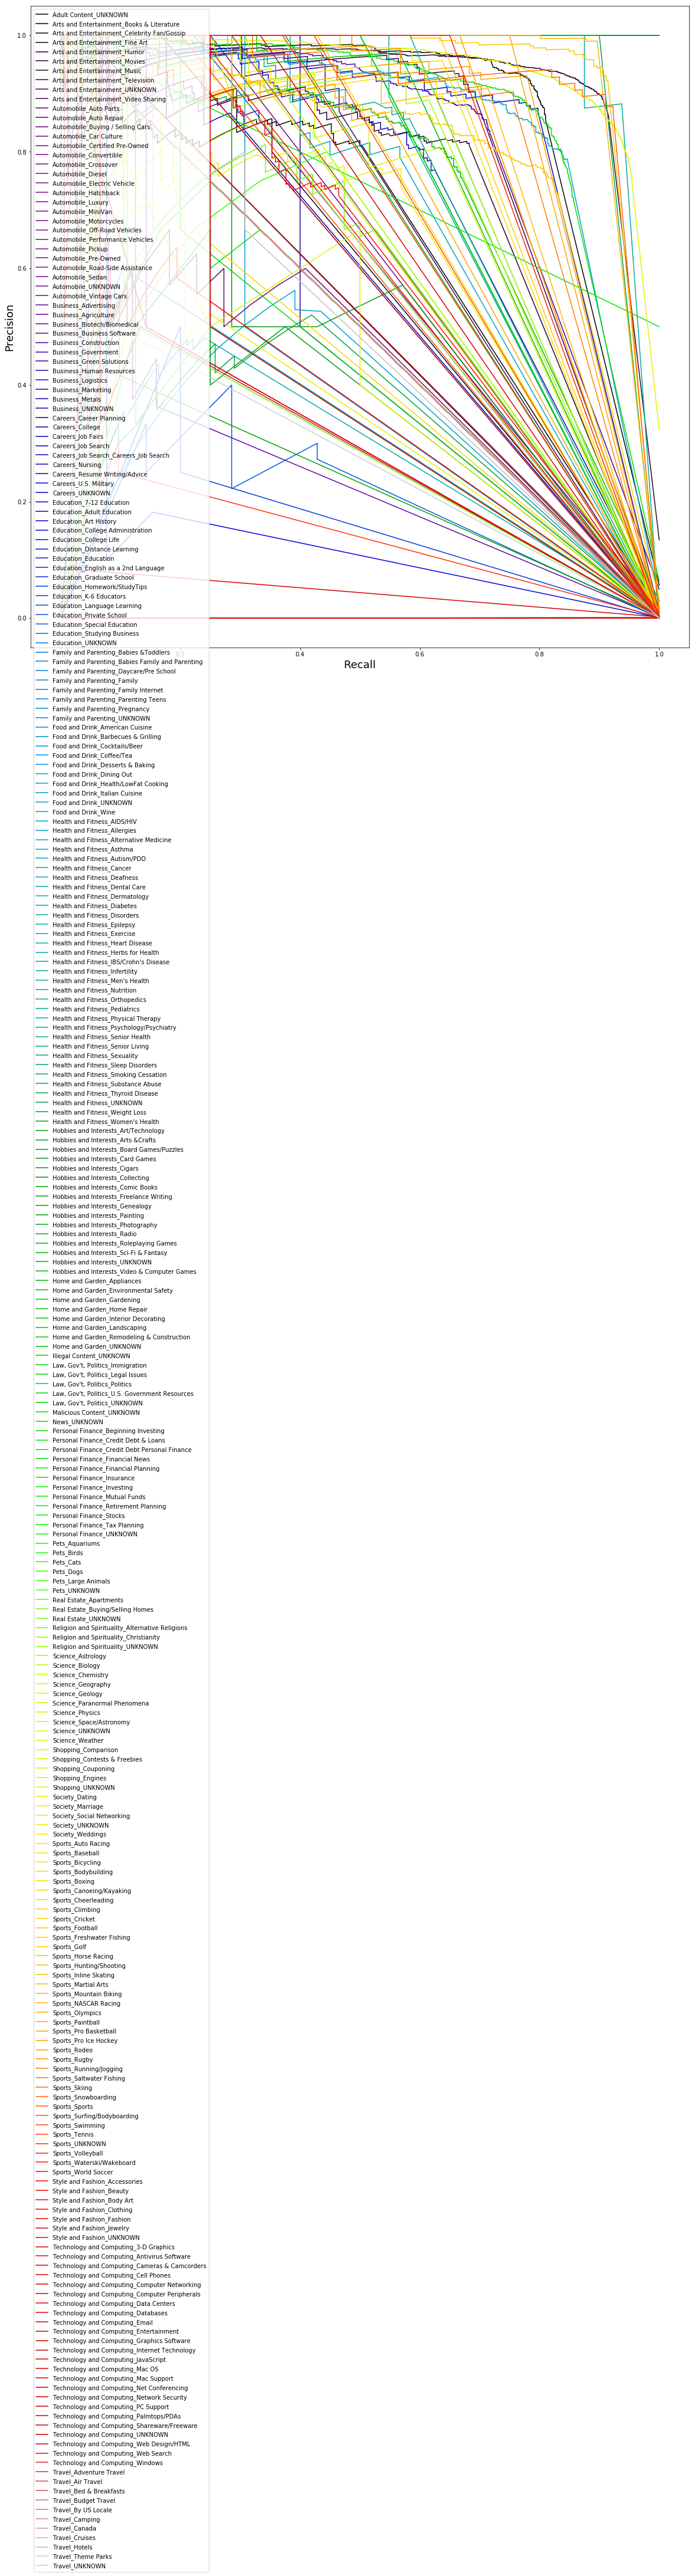

In [37]:
# Plot Precision - Recall Curves

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

keep_maxval = (pred_prob == pred_prob.max(axis=1, keepdims=True)).astype(int)
pred_prob_new = pred_prob*keep_maxval
# clf.classes_
labels = clf.classes_
precision = {}
recall = {}
threshold = {}
for i in range(len(labels)):
    temp = test.copy()
    temp['y_true'] = 0
    temp['y_true'][temp['label']==labels[i]] = 1
    precision[i], recall[i], threshold[i] = precision_recall_curve(np.array(temp['y_true']),pred_prob_new[:,i])

f,ax = plt.subplots(figsize=(20,20))
# f.figure()
number_of_plots = len(labels)
colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
ax.set_color_cycle([colormap(i) for i in np.linspace(0, 1,number_of_plots)])
for i in range(len(labels)):
    plt.plot(recall[i],precision[i])
# plt.plot(precision[1],recall[1])
plt.xlabel('Recall',fontsize=18)
plt.ylabel('Precision',fontsize=18)
plt.legend(labels,loc=0)
plt.show()

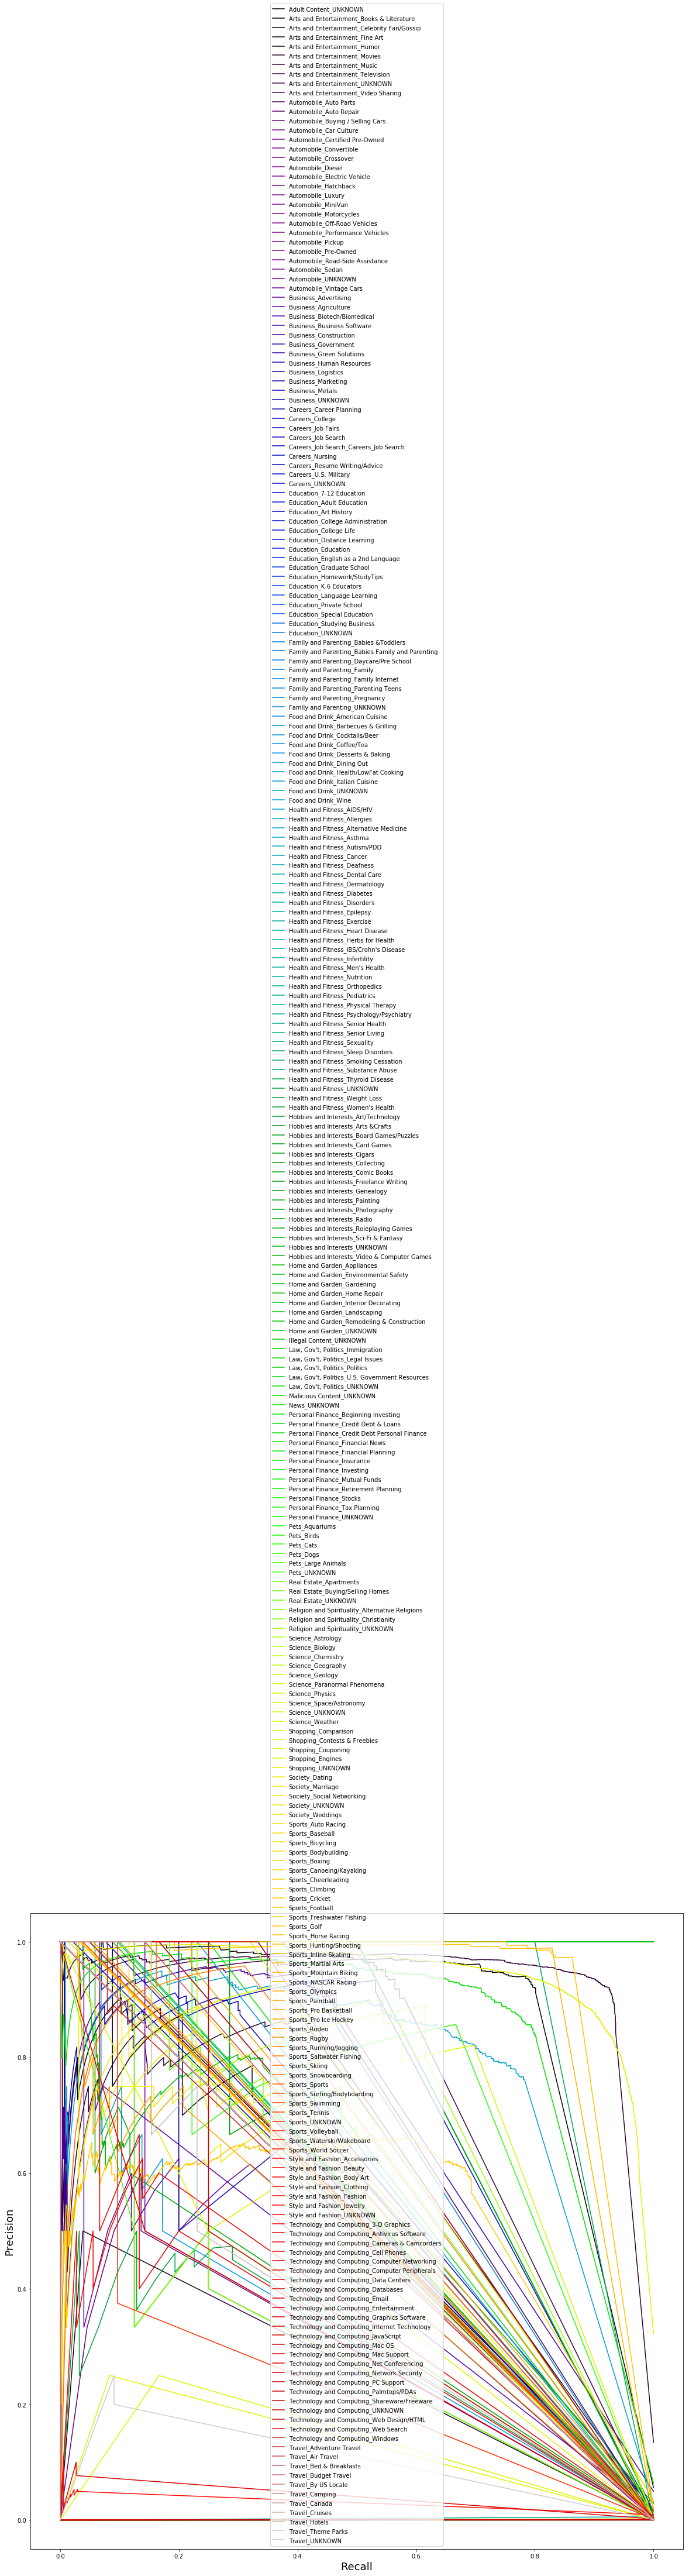

In [39]:
# Older

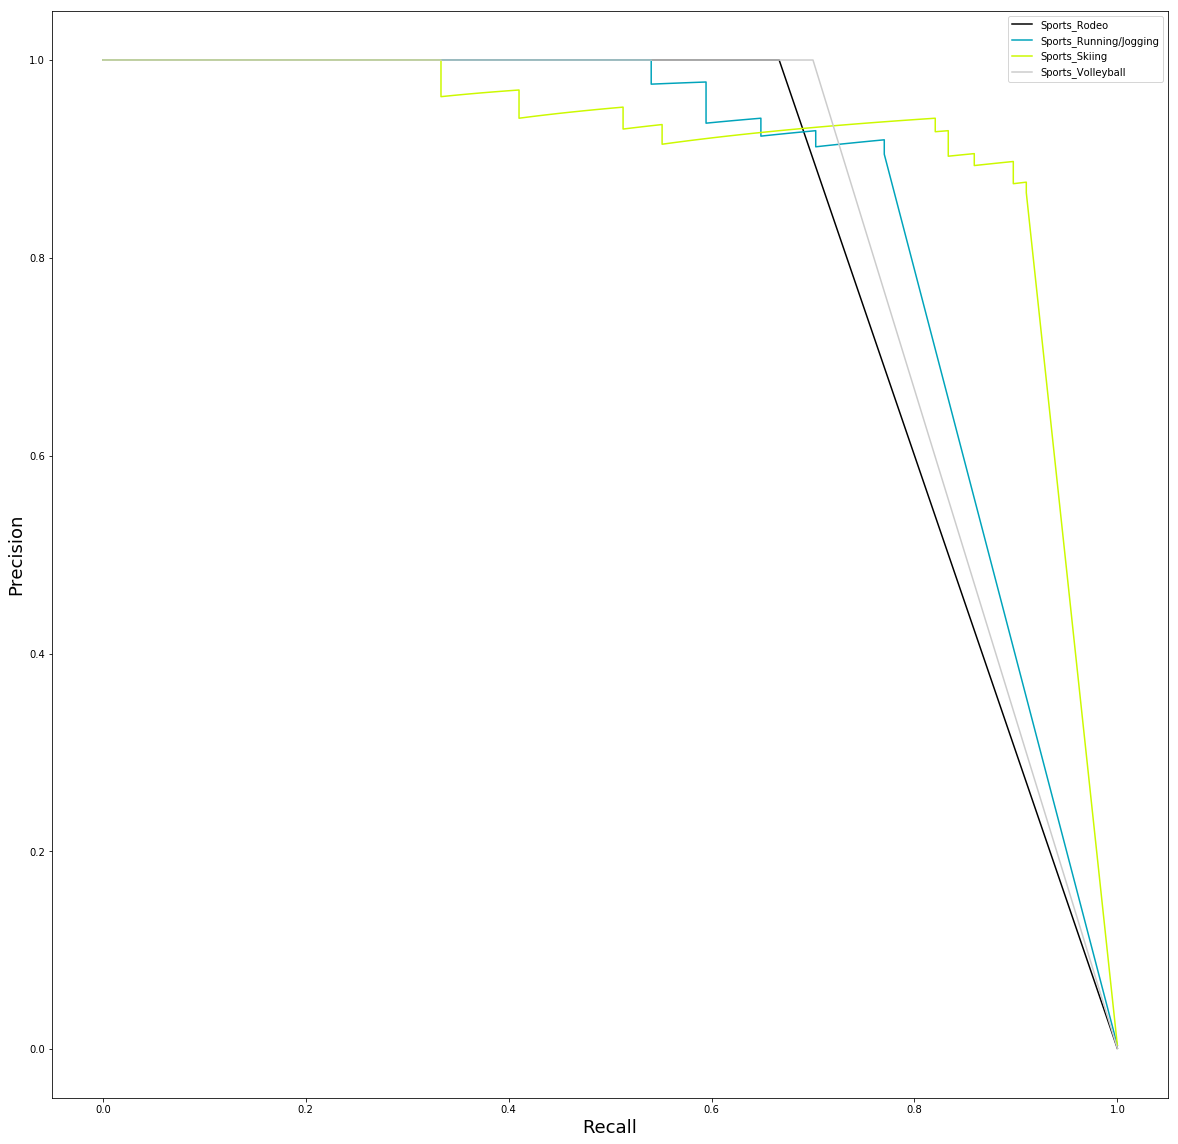

In [25]:
labels_to_retain = ['Sports_Rodeo','Sports_Running/Jogging','Sports_Skiing','Sports_Volleyball']
labels_to_retain.sort()

f,ax = plt.subplots(figsize=(20,20))
# f.figure()
number_of_plots = len(labels_to_retain)
colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
ax.set_color_cycle([colormap(i) for i in np.linspace(0, 1,number_of_plots)])
for i in range(len(labels)):
    if(labels[i] in labels_to_retain):
        plt.plot(recall[i],precision[i])
# plt.plot(precision[1],recall[1])
plt.xlabel('Recall',fontsize=18)
plt.ylabel('Precision',fontsize=18)
plt.legend(labels_to_retain,loc=0)
plt.show()

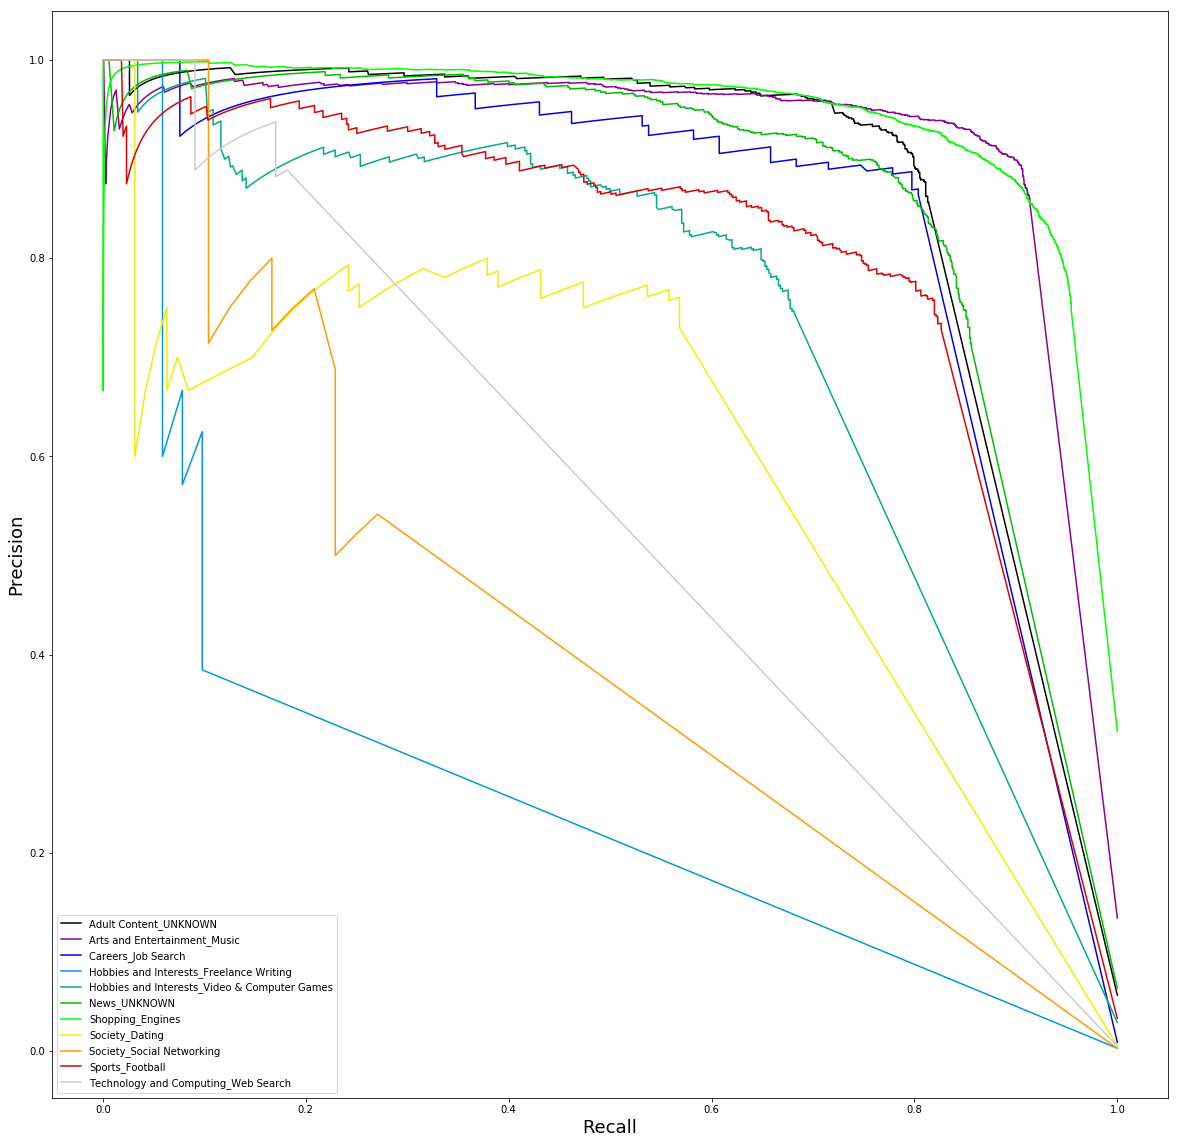

In [30]:
labels_to_retain = ['Automobile_Electric Vehicle,Automobile_Sedan,Automobile_Certified Pre-Owned,Automobile_MiniVan,Automobile_Buying / Selling Cars,Automobile_Hybrid,Automobile_Pickup,Automobile_Auto Parts,Automobile_Hatchback,Automobile_Off-Road Vehicles,Automobile_Crossover,Automobile_Car Culture,Automobile_Trucks & Accessories,Automobile_Diesel,Automobile_Wagon,Automobile_Convertible,Automobile_Road-Side Assistance,Automobile_Coupe,Automobile_Luxury,Automobile_Performance Vehicles,Automobile_Auto Repair,Automobile_Motorcycles,Automobile_Vintage Cars']
labels_to_retain.sort()

f,ax = plt.subplots(figsize=(20,20))
# f.figure()
number_of_plots = len(labels_to_retain)
colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
ax.set_color_cycle([colormap(i) for i in np.linspace(0, 1,number_of_plots)])
for i in range(len(labels)):
    if(labels[i] in labels_to_retain):
        plt.plot(recall[i],precision[i])
# plt.plot(precision[1],recall[1])
plt.xlabel('Recall',fontsize=18)
plt.ylabel('Precision',fontsize=18)
plt.legend(labels_to_retain,loc=0)
plt.show()

Older

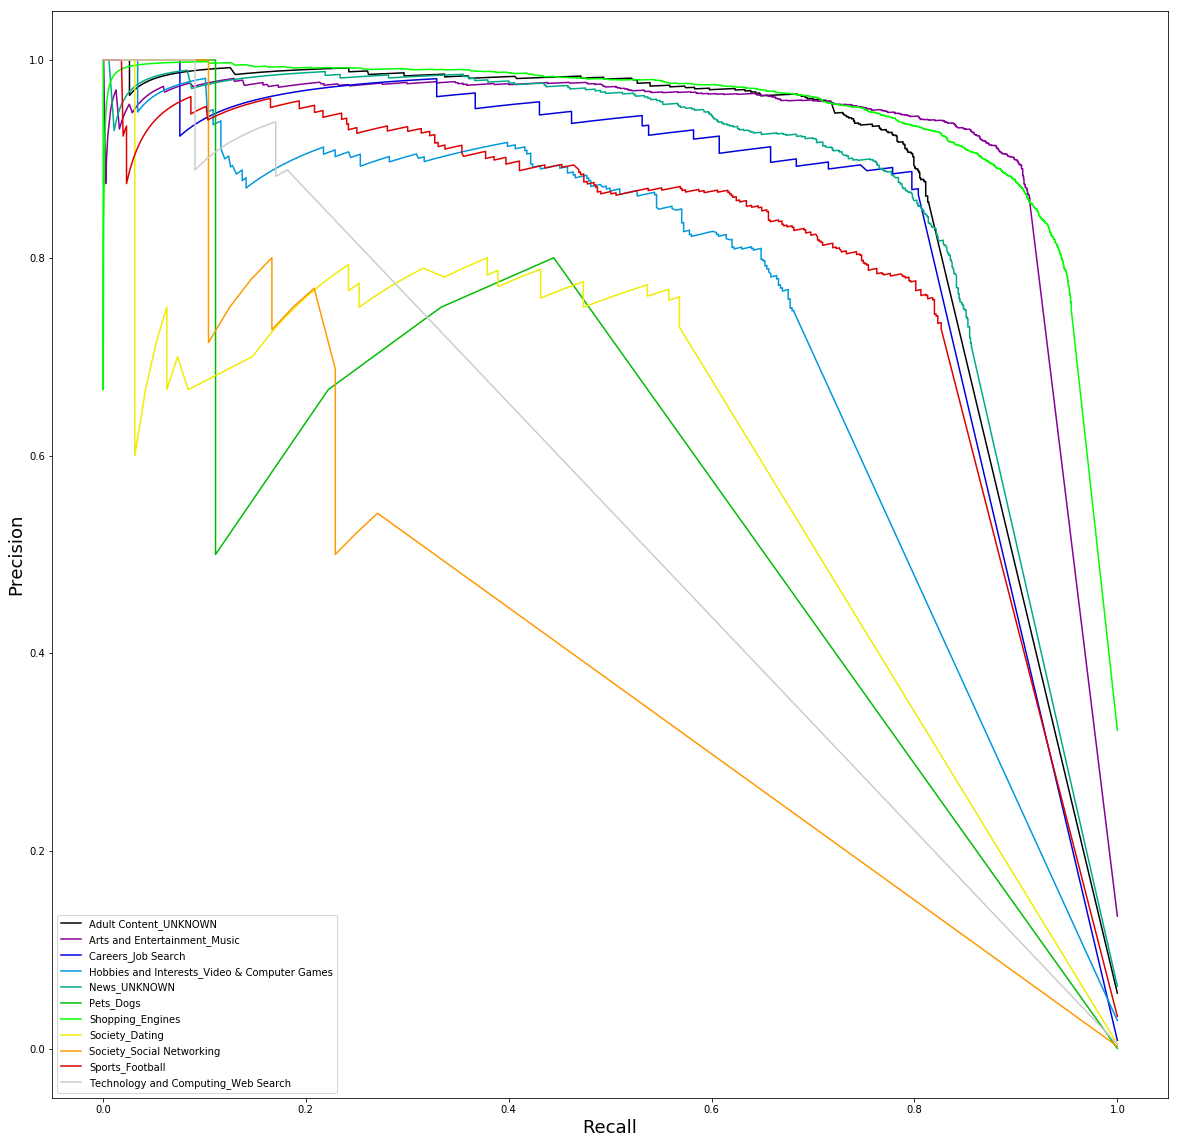

In [56]:
labels_to_retain = ['Shopping_Engines','Arts and Entertainment_Music','News_UNKNOWN','Adult Content_UNKNOWN',
                    'Hobbies and Interests_Video & Computer Games','Sports_Football','Careers_Job Search',
                    'Society_Dating','Technology and Computing_Web Search','Society_Social Networking']
labels_to_retain.sort()

f,ax = plt.subplots(figsize=(20,20))
# f.figure()
number_of_plots = len(labels_to_retain)
colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
ax.set_color_cycle([colormap(i) for i in np.linspace(0, 1,number_of_plots)])
for i in range(len(labels)):
    if(labels[i] in labels_to_retain):
        plt.plot(recall[i],precision[i])
# plt.plot(precision[1],recall[1])
plt.xlabel('Recall',fontsize=18)
plt.ylabel('Precision',fontsize=18)
plt.legend(labels_to_retain,loc=0)
plt.show()


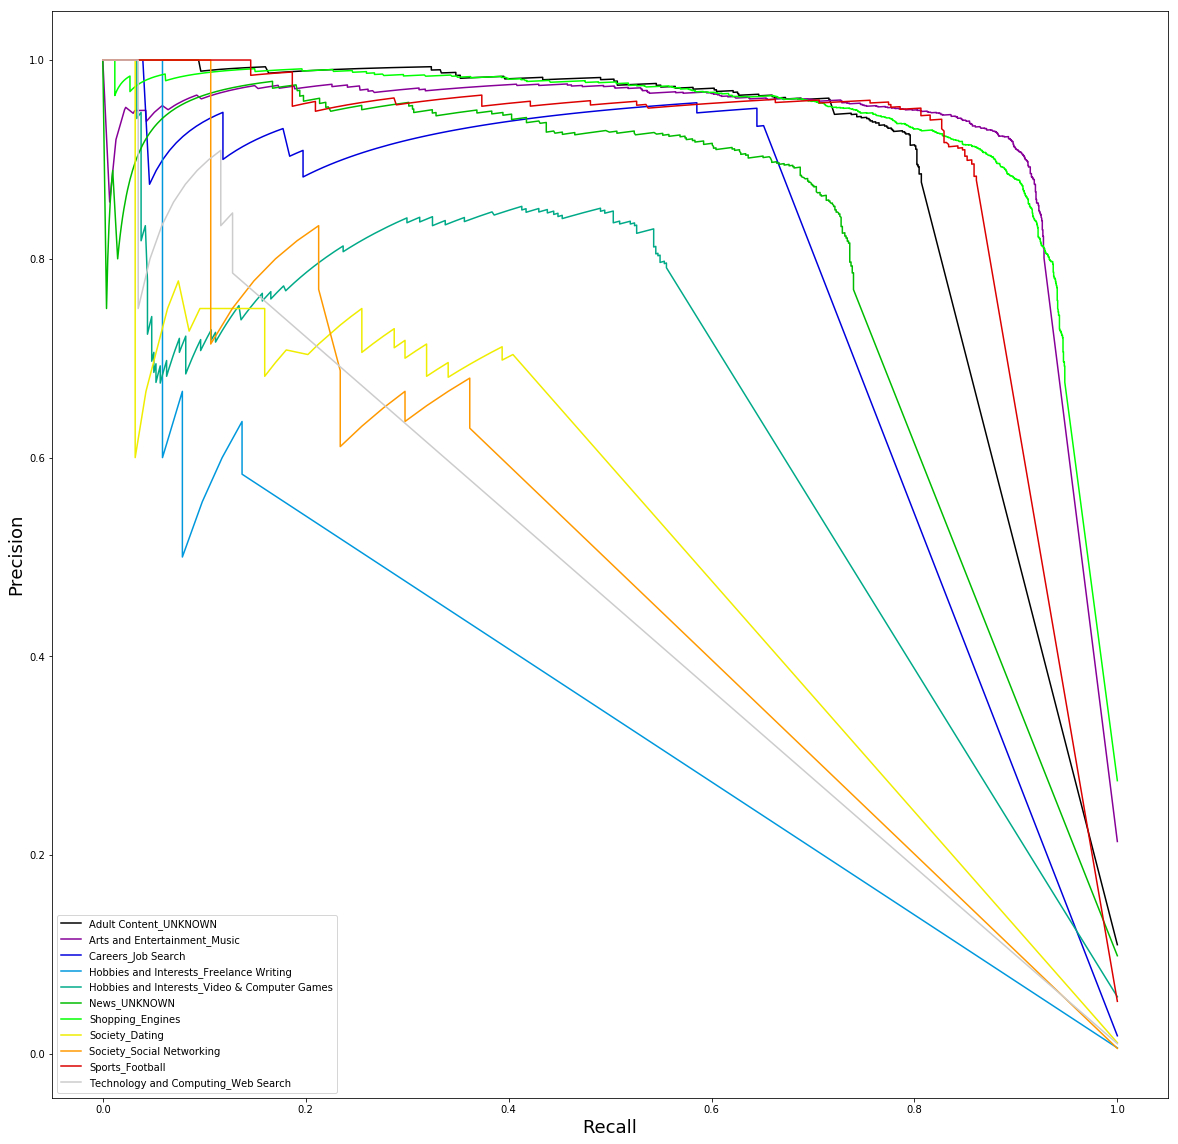

In [75]:
labels_to_retain = ['Shopping_Engines','Arts and Entertainment_Music','News_UNKNOWN','Adult Content_UNKNOWN',
                    'Hobbies and Interests_Video & Computer Games','Sports_Football','Careers_Job Search',
                    'Society_Dating','Technology and Computing_Web Search','Society_Social Networking',
                    'Hobbies and Interests_Freelance Writing']
labels_to_retain.sort()

f,ax = plt.subplots(figsize=(20,20))
# f.figure()
number_of_plots = len(labels_to_retain)
colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
ax.set_color_cycle([colormap(i) for i in np.linspace(0, 1,number_of_plots)])
for i in range(len(labels)):
    if(labels[i] in labels_to_retain):
        plt.plot(recall[i],precision[i])
# plt.plot(precision[1],recall[1])
plt.xlabel('Recall',fontsize=18)
plt.ylabel('Precision',fontsize=18)
plt.legend(labels_to_retain,loc=0)
plt.show()

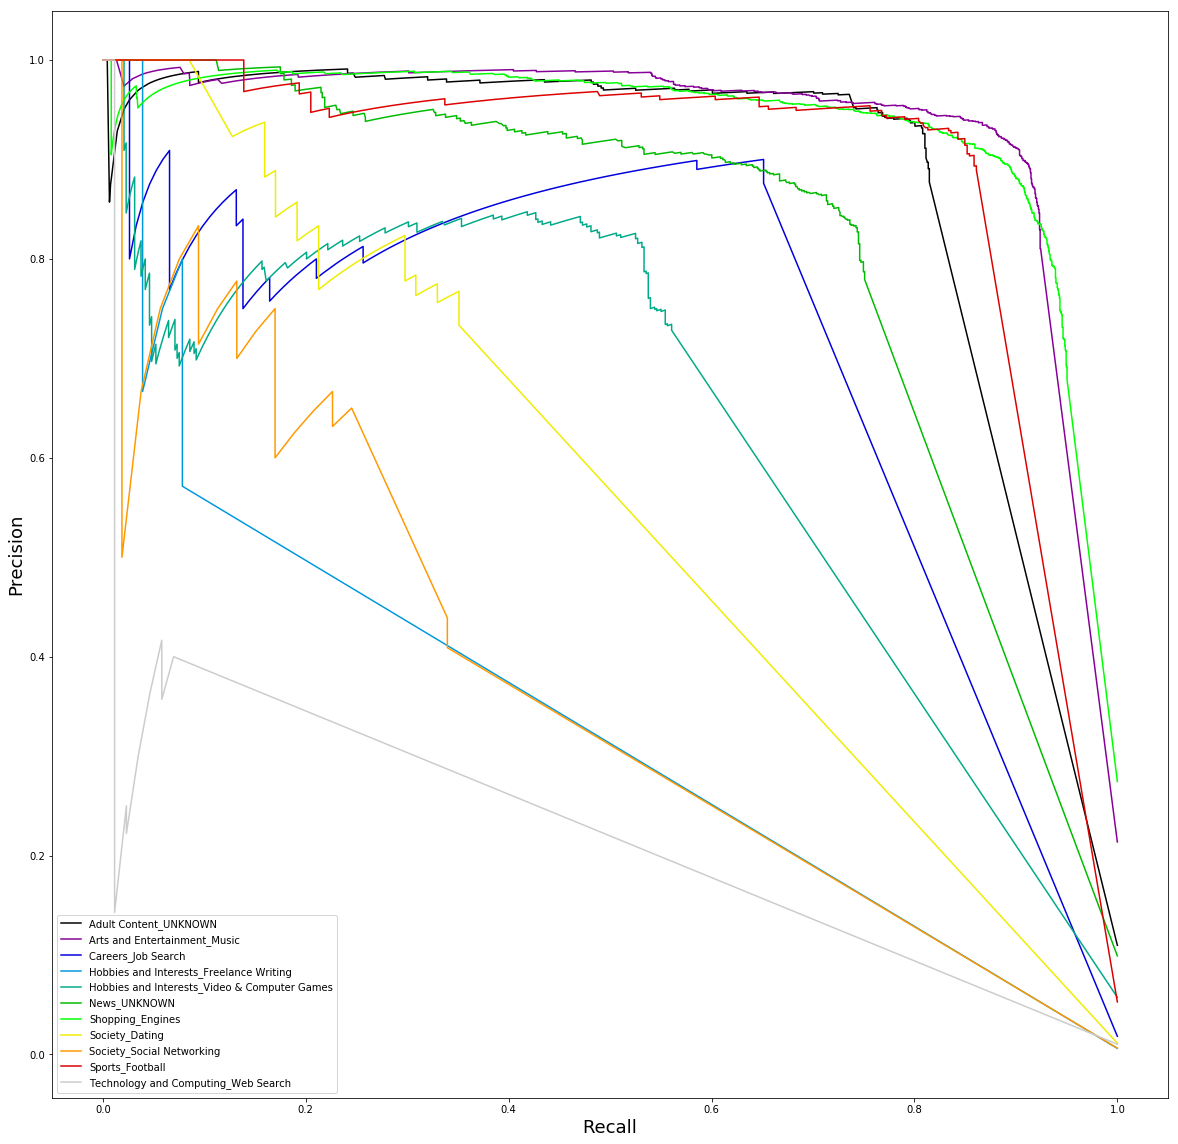